In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplcursors
from ipywidgets import interactive, Button
import plotly.graph_objs as go



In [1]:
!git init

Reinitialized existing Git repository in C:/Users/kayna/.git/


In [2]:
!git add RSM_data_classification_v10.ipynb

In [3]:
!git commit -m "initial commit on rsm_data_classification_v10"

On branch master
Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.anaconda/
	.bash_history
	.conda/
	.condarc
	.continuum/
	.gitconfig
	.gitignore.txt
	.idlerc/
	.ipynb_checkpoints/
	.ipython/
	.jupyter/
	.keras/
	.lesshst
	.matplotlib/
	.spyder-py3/
	.virtual_documents/
	3D Objects/
	AllgitStuff/
	AppData/
	Contacts/
	Downloads/
	Example/
	FDD.py
	Favorites/
	H_RSM_with_Threshold_and_Detected_Outliers1.png
	H_RSM_with_Threshold_and_Detected_Outliers2.png
	IntelGraphicsProfiles/
	Jedi/
	Links/
	Music/
	NTUSER.DAT
	NTUSER.DAT{53b39e88-18c4-11ea-a811-000d3aa4692b}.TM.blf
	NTUSER.DAT{53b39e88-18c4-11ea-a811-000d3aa4692b}.TMContainer00000000000000000001.regtrans-ms
	NTUSER.DAT{53b39e88-18c4-11ea-a811-000d3aa4692b}.TMContainer00000000000000000002.regtrans-ms
	OneDrive/
	PycharmProjects/
	RSM_data_classification_OUTLIER_v2.ipynb
	RSM_data_classification_RUN89data_plot.ipynb
	RSM_data_classification_accuracy_v3.ipynb
	RSM_data_classification_v9.ipynb
	Saved 

In [4]:
!git remote add origin https://github.com/korkutphd/ML_for_Transtek.git

error: remote origin already exists.


In [5]:
!git push -u origin master

bash: line 1: /dev/tty: No such device or address
error: failed to execute prompt script (exit code 1)
fatal: could not read Username for 'https://github.com': No such file or directory


In [2]:
import os
import pandas as pd

sampling_freq = 10

def load_excel_files(folder_path):
    # List to store DataFrames from each CSV file
    dfs = []

    # Check if the folder exists
    if not os.path.exists(folder_path):
        raise ValueError(f"The folder path {folder_path} does not exist.")
    
    # Iterate over each file in the folder
    for file in os.listdir(folder_path):
        if file.endswith('.csv'):
            # Read CSV file into DataFrame
            df = pd.read_csv(os.path.join(folder_path, file), encoding='latin1')
            dfs.append(df)

    # Check if any CSV files were found
    if not dfs:
        raise ValueError("No CSV files found in the folder.")
    
    # Combine all DataFrames into a single DataFrame
    combined_df = pd.concat(dfs, ignore_index=True)
    return combined_df

def create_target_column(df):
    # Create a new column "Target" based on defect types
    df['Target'] = 0
    df.loc[df['Cracking'] == 1, 'Target'] = 1
    df.loc[df['Patching'] == 1, 'Target'] = 2
    df.loc[df['Potholes'] == 1, 'Target'] = 3
    return df

# Folder path containing CSV files
folder_path = r'C:\Users\kayna\OneDrive\Desktop\Transtek - Bridge Monitoring Connected Vehicles\RSM\2024 03 07 Oviedo Pavement Data\2024 03 07 Oviedo Pavement Data\evalute trained model data'

# Load CSV files into a single DataFrame
try:
    combined_df = load_excel_files(folder_path)
except ValueError as e:
    print(e)
else:
    # Create "Target" column based on defect types
    combined_df = create_target_column(combined_df)

    # Extract columns "H_RSM" and "Target"
    final_df = combined_df[['H_RSM', 'Target']]

    # Display final DataFrame
    print(final_df)

           H_RSM  Target
0       0.000000       0
1       0.000000       0
2       0.000000       0
3       0.000000       0
4       0.000000       0
...          ...     ...
9703  567.336422       0
9704  567.336422       0
9705  567.336422       0
9706  567.336422       0
9707  567.336422       0

[9708 rows x 2 columns]


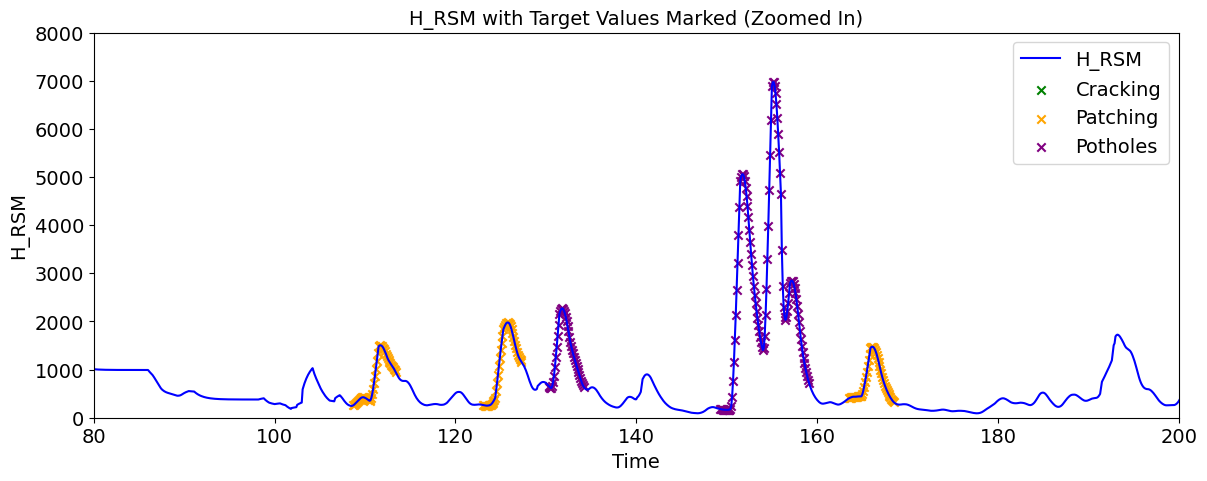

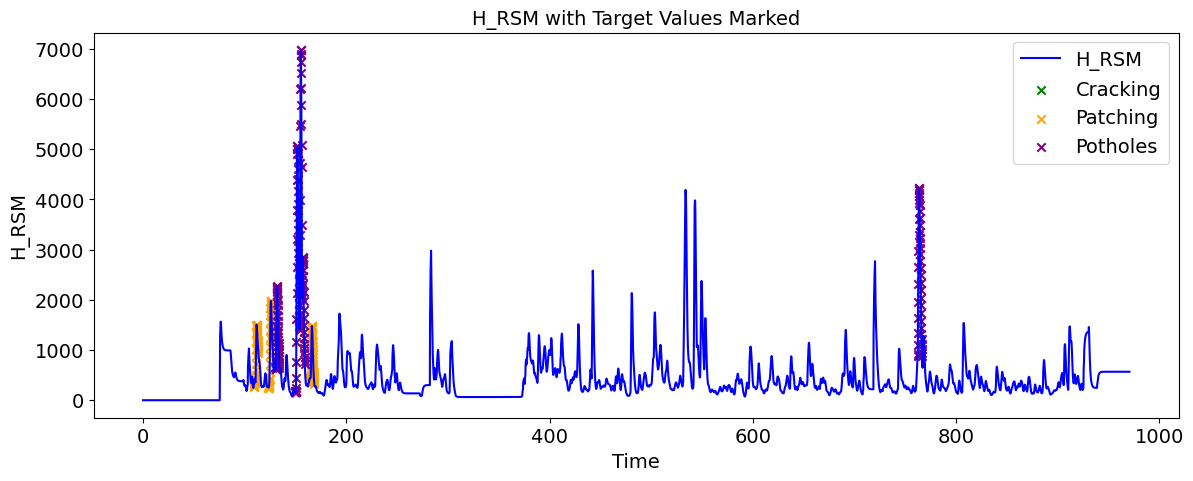

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_H_RSM_with_targets(df, sampling_freq, legend_names=None, xlabel_size=12, ylabel_size=12, label_size=12, legend_size=12):
    plt.figure(figsize=(14, 5))
    
    # Plot H_RSM
    plt.plot(df.index / sampling_freq, df['H_RSM'], label='H_RSM', color='blue')
    
    # Mark different target values
    colors = {1: 'green', 2: 'orange', 3: 'purple'}
    for target_value, color in colors.items():
        indices = df[df['Target'] == target_value].index
        plt.scatter(indices / sampling_freq, df['H_RSM'].iloc[indices], color=color, label=f'Target {target_value}', marker='x')
    
    plt.xlabel('Time', fontsize=xlabel_size)
    plt.ylabel('H_RSM', fontsize=ylabel_size)
    plt.title('H_RSM with Target Values Marked', fontsize=label_size)
    
    if legend_names:
        plt.legend(legend_names, fontsize=legend_size)
    else:
        plt.legend(fontsize=legend_size)
    
    plt.xticks(fontsize=xlabel_size)
    plt.yticks(fontsize=ylabel_size)
    
    plt.show()

# Function to zoom in on a specific section of the plot
def zoom_plot(df, xmin, xmax, ymin=None, ymax=None, sampling_freq=10, legend_names=None, xlabel_size=12, ylabel_size=12, label_size=12, legend_size=12):
    plt.figure(figsize=(14, 5))
    
    # Plot H_RSM
    plt.plot(df.index / sampling_freq, df['H_RSM'], label='H_RSM', color='blue')
    
    # Mark different target values
    colors = {1: 'green', 2: 'orange', 3: 'purple'}
    for target_value, color in colors.items():
        indices = df[df['Target'] == target_value].index
        plt.scatter(indices / sampling_freq, df['H_RSM'].iloc[indices], color=color, label=f'Target {target_value}', marker='x')
    
    plt.xlabel('Time', fontsize=xlabel_size)
    plt.ylabel('H_RSM', fontsize=ylabel_size)
    plt.title('H_RSM with Target Values Marked (Zoomed In)', fontsize=label_size)
    
    if legend_names:
        plt.legend(legend_names, fontsize=legend_size)
    else:
        plt.legend(fontsize=legend_size)
    
    # Set zoom range
    plt.xlim(xmin / sampling_freq, xmax / sampling_freq)
    if ymin is not None and ymax is not None:
        plt.ylim(ymin, ymax)
    
    plt.xticks(fontsize=xlabel_size)
    plt.yticks(fontsize=ylabel_size)
    
    plt.show()

# Example of zooming in (customize the indices and range as needed)
zoom_plot(final_df, 800, 2000, 0, 8000, sampling_freq=10, legend_names=['H_RSM', 'Cracking', 'Patching','Potholes'], xlabel_size=14, ylabel_size=14, label_size=14, legend_size=14)  # Adjust the range and legend names as necessary

# Plot the data
plot_H_RSM_with_targets(final_df, 10, legend_names=['H_RSM', 'Cracking', 'Patching','Potholes'], xlabel_size=14, ylabel_size=14, label_size=14, legend_size=14)


In [4]:
def increase_consecutive_values(df):
    # Initialize a counter to keep track of consecutive values
    count = 1

    # Iterate over rows in the DataFrame
    for i in range(1,len(df)-1):
        # Check if the current value is 1, 2, or 3
        if df.loc[i, 'Target'] in [0,1, 2, 3]:
            # Check if the current value is equal to the next value
            if df.loc[i, 'Target'] in (1,2,3) and (df.loc[i, 'Target'] == df.loc[i + 1, 'Target'] or df.loc[i, 'Target'] == df.loc[i - 1, 'Target']):
                # Increment the counter
                count += 1
                print(count)
                if count==2:
                  df.loc[i-3:i+1, 'Target'] = df.loc[i, 'Target']
            else:
                # If the counter is greater than 1, repeat the value for the consecutive sequence
                if count > 1:
                    df.loc[i, 'Target'] = df.loc[i - 1, 'Target']
                # Reset the counter
                    count -= 1
                    print(count)
                else:
                    continue
            
    return df

# Apply the function to increase consecutive values by 2 for values 1, 2, and 3
modified_df = increase_consecutive_values(final_df)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
8

In [5]:
#input_data = [0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,2,2,0,2,2,0,0,0,0,0,0,0,0,3,3,3,0,0,0,0,0]
#df = pd.DataFrame({'Target': input_data})

#modified_df = increase_consecutive_values(df)
#print(modified_df['Target'].tolist())

In [6]:
import numpy as np
import pandas as pd

# Function to find local minima in the time series
def find_local_minima(time_series):
    local_minima_indices = np.where((time_series[:-2] > time_series[1:-1]) & (time_series[1:-1] < time_series[2:]))[0] + 1
    return local_minima_indices

# Function to find local maxima in the time series
def find_local_maxima(time_series):
    local_maxima_indices = np.where((time_series[:-2] < time_series[1:-1]) & (time_series[1:-1] > time_series[2:]))[0] + 1
    return local_maxima_indices

# Function to segment the time series based on local minima
def segment_data(time_series):
    local_minima_indices = find_local_minima(time_series)
    
    # If there are no local minima, the entire time series is one segment
    if len(local_minima_indices) == 0:
        return [time_series]
    
    segments = []
    
    # First segment from the start to the first local minimum
    segments.append(time_series[:local_minima_indices[0]])
    
    # Intermediate segments from one local minimum to the next
    for i in range(len(local_minima_indices) - 1):
        segments.append(time_series[local_minima_indices[i]:local_minima_indices[i + 1]])
    
    # Last segment from the last local minimum to the end of the time series
    segments.append(time_series[local_minima_indices[-1]:])
    
    return segments

# Function to apply segmentation on the DataFrame
def apply_segmentation(df, target_col='Target', time_series_col='H_RSM'):
    segmented_data = []
    original_data = []

    for _, group in df.groupby((df[target_col] != df[target_col].shift()).cumsum()):
        target_value = group[target_col].iloc[0]

        if target_value in [1, 2, 3]:
            time_series = group[time_series_col].values

           
            
            # Find local maxima within the time series segment
            local_maxima_indices = find_local_maxima(time_series)
            
            # Apply segmentation only if there are more than 2 local maxima
            if len(local_maxima_indices) > 2:
                segments = segment_data(time_series)
                segmented_data.extend([(segment, target_value) for segment in segments])
            else:
                original_data.append((time_series, target_value))
  

    return segmented_data, original_data

# Example usage
segmented_data, original_data = apply_segmentation(modified_df)



In [7]:
len(original_data)

2

In [8]:
len(segmented_data)

21

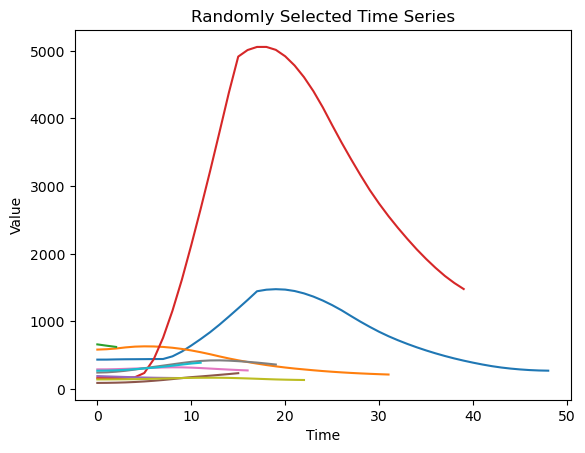

In [9]:

import random
import matplotlib.pyplot as plt

# Function to plot random time series
def plot_random_time_series(data, num_plots=10):
    # Set a random seed (optional but ensures reproducibility)
    random.seed()
    if len(data)<=9:
        num_plots=len(data)
    # Get a random sample of indices
    indices = random.sample(range(len(data)), num_plots)

    # Plot the selected time series
    for idx in indices:
        time_series, _ = data[idx]  # Extract time series from tuple
        plt.plot(time_series)

    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Randomly Selected Time Series')
    plt.show()

# Example usage
# Assuming your array of tuples is named 'data'
plot_random_time_series(segmented_data)

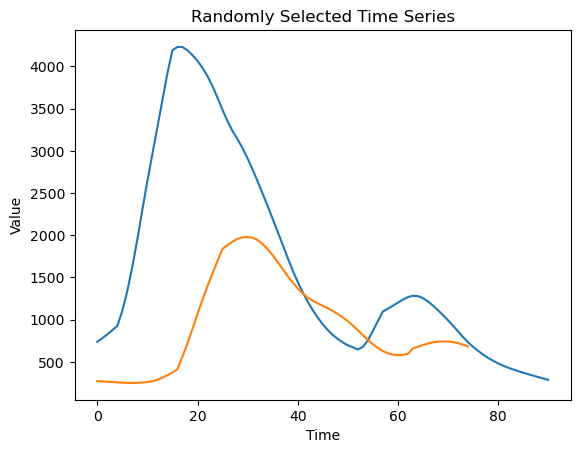

In [10]:
plot_random_time_series(original_data)

In [11]:
def remove_tuples_with_long_series(data, max_length=25):
    filtered_data = [tup for tup in data if len(tup[0]) >= max_length]
    return filtered_data


filtered_data = remove_tuples_with_long_series(segmented_data)


In [12]:
import numpy as np
import pandas as pd

def has_local_maxima(time_series):
    local_maxima_indices = np.where((time_series[:-2] < time_series[1:-1]) & (time_series[1:-1] > time_series[2:]))[0] + 1
    return len(local_maxima_indices) > 0

def is_decreasing(series):
    return all(x > y for x, y in zip(series, series[1:]))

def is_increasing(series):
    return all(x < y for x, y in zip(series, series[1:]))

def remove_invalid_tuples(data):
    filtered_data2 = []
    
    for time_series, label in data:
        if len(time_series) >= 15 and is_decreasing(time_series[:15]):
            continue
        if len(time_series) >= 9 and is_increasing(time_series[-9:]):
            continue
        if not has_local_maxima(time_series):
            continue
        filtered_data2.append((time_series, label))
    
    return filtered_data2



filtered_data2 = remove_invalid_tuples(original_data)


In [13]:
print(len(filtered_data))
print(len(filtered_data2))

10
2


In [14]:
from collections import Counter

def counttargets(insert_tuple):
    targets = [target for _, target in insert_tuple]
# Count the occurrences of each target
    target_counts = Counter(targets)
# Print the counts
    for target, count in target_counts.items():
        print(f"Target {target}: {count} occurrences")

counttargets(filtered_data)
counttargets(filtered_data2)

Target 2: 5 occurrences
Target 3: 5 occurrences
Target 2: 1 occurrences
Target 3: 1 occurrences


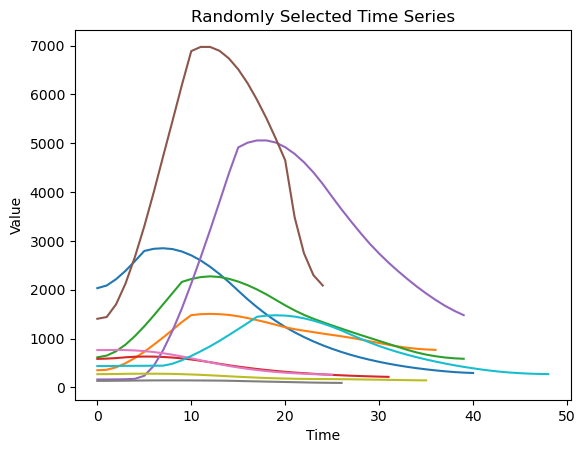

In [15]:
plot_random_time_series(filtered_data)

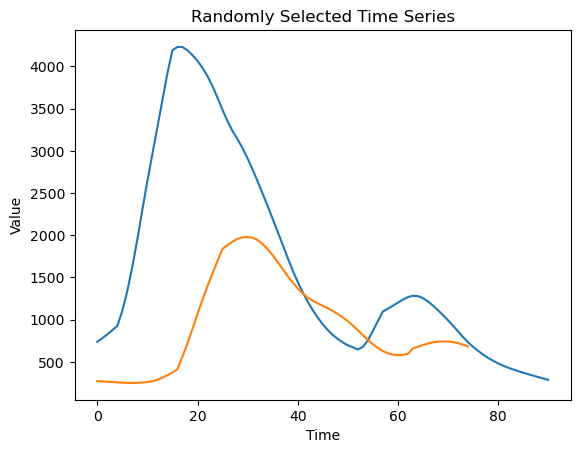

In [16]:
plot_random_time_series(filtered_data2)

In [17]:
def find_first_peak(time_series):
    # Find the index of the first peak in the time series
    for i in range(1, len(time_series) - 1):
        if time_series[i] > time_series[i - 1] and time_series[i] > time_series[i + 1]:
            return i
    return None  # Return None if no peak is found

def remove_invalid_tuples(series):
    valid_series = []
    for time_series, target in series:
        first_peak_index = find_first_peak(time_series)
        if first_peak_index is None:
            # No peak found, skip this tuple
            continue
        if time_series[0] <= 0.7 * time_series[first_peak_index]:
            # First value is more than half of the peak value, keep this tuple
            valid_series.append((time_series, target))
    return valid_series


# Remove invalid tuples
valid_series1 = remove_invalid_tuples(filtered_data)
valid_series2 = remove_invalid_tuples(filtered_data2)

In [18]:
print(len(valid_series1))
print(len(valid_series2))

5
2


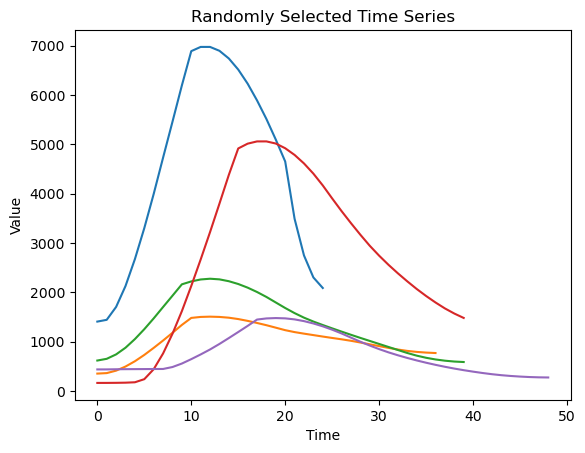

In [19]:
plot_random_time_series(valid_series1)

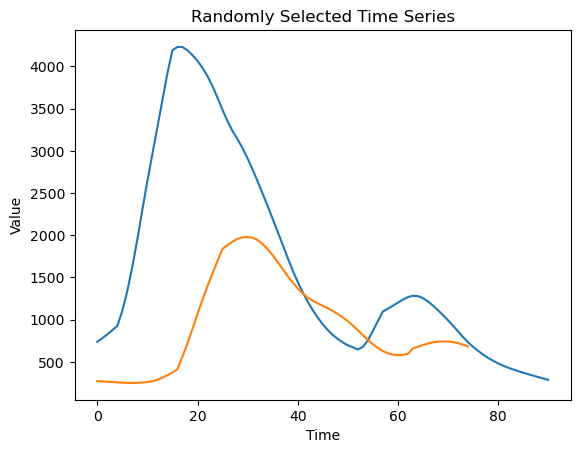

In [20]:
plot_random_time_series(valid_series2)

In [21]:
import numpy as np
from scipy.optimize import curve_fit, OptimizeWarning
from scipy.stats import exponnorm, entropy, kurtosis, skew
from sklearn.metrics import auc
import pandas as pd
from numpy.polynomial.polynomial import Polynomial

def detect_peaks(signal):
    from scipy.signal import find_peaks
    peaks, _ = find_peaks(signal)
    return peaks

def fit_exponentially_modified_gaussian(x, y):
    def exponential_gaussian(x, mu, sigma, lambd, A):
        return A * exponnorm.pdf(x - mu, lambd, 0, sigma)

    if len(x) < 4:
        return [np.mean(x), np.std(x), 1, max(y)]

    p0 = [np.mean(x), np.std(x), 1, max(y)]
    try:
        popt, _ = curve_fit(exponential_gaussian, x, y, p0=p0)
    except RuntimeError as e:
        print(f"RuntimeError: {e}")
        popt = p0
    except OptimizeWarning as e:
        print(f"OptimizeWarning: {e}")
        popt = p0

    return popt

def normalize_data(x, y):
    x_norm = (x - x.min()) / (x.max() - x.min())
    y_norm = (y - y.min()) / (y.max() - y.min())
    return x_norm, y_norm

def calculate_peak_statistics(signal, peaks, initiation_point, after_peak_ratio):
    if len(peaks) == 0:
        return None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None
    
    first_peak = peaks[0]
    initiation_index = np.argmax(signal > initiation_point * max(signal))  # Index of initiation point
    
    # Calculate slope of the line from the beginning to the first peak
    slope_to_peak = (signal[first_peak] - signal[initiation_index]) / (first_peak - initiation_index)
    
    # Divide the time series into two sections: before and after the peak
    after_peak_threshold = after_peak_ratio * signal[first_peak]
    division_index = next((i for i, v in enumerate(signal[first_peak:]) if v <= after_peak_threshold), None)
    
    if division_index is None:
        return None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None
    
    division_index += first_peak
    first_segment = signal[:division_index]
    second_segment = signal[division_index:]
    
    # Calculate the slope from the first peak to the division index
    slope_after_peak = (signal[division_index] - signal[first_peak]) / (division_index - first_peak)
    
    # Fit an exponentially modified Gaussian distribution to the second section
    x_after_peak = np.arange(len(second_segment))
    y_after_peak = second_segment
    mu, sigma, lambd, A = fit_exponentially_modified_gaussian(x_after_peak, y_after_peak)
    
    # Calculate the duration of each section and take their ratios
    duration_before_peak = len(first_segment)
    duration_after_peak = len(second_segment)
    duration_ratio = duration_before_peak / duration_after_peak
    
    # Calculate the area under each time series section and calculate their ratio
    area_first_segment = auc(np.arange(len(first_segment)), first_segment)
    area_second_segment = auc(np.arange(len(second_segment)), second_segment)
    area_ratio = area_first_segment / area_second_segment

    # Calculate standard deviation, skewness, and kurtosis for the segment around the first peak
    segment = signal[initiation_index:division_index]
    std_segment = np.std(segment)
    skewness_segment = skew(segment)
    kurtosis_segment = kurtosis(segment)

    # Normalize data for polynomial fitting
    x_before_peak = np.arange(initiation_index, first_peak)
    y_before_peak = signal[initiation_index:first_peak]
    x_norm_before_peak, y_norm_before_peak = normalize_data(x_before_peak, y_before_peak)

    x_after_peak = np.arange(first_peak, division_index)
    y_after_peak = signal[first_peak:division_index]
    x_norm_after_peak, y_norm_after_peak = normalize_data(x_after_peak, y_after_peak)

    # Calculate polynomial fits
    poly_before_peak = Polynomial.fit(x_norm_before_peak, y_norm_before_peak, 3)
    poly_after_peak = Polynomial.fit(x_norm_after_peak, y_norm_after_peak, 3)
    
    # Divide the segment before division index into four equal parts and calculate area ratios
    segment_length = division_index - initiation_index
    quarter_length = segment_length // 4
    areas_before_division = [
        auc(np.arange(initiation_index, initiation_index + quarter_length), signal[initiation_index:initiation_index + quarter_length]),
        auc(np.arange(initiation_index + quarter_length, initiation_index + 2 * quarter_length), signal[initiation_index + quarter_length:initiation_index + 2 * quarter_length]),
        auc(np.arange(initiation_index + 2 * quarter_length, initiation_index + 3 * quarter_length), signal[initiation_index + 2 * quarter_length:initiation_index + 3 * quarter_length]),
        auc(np.arange(initiation_index + 3 * quarter_length, division_index), signal[initiation_index + 3 * quarter_length:division_index])
    ]
    area_ratios_before_division = [areas_before_division[i] / areas_before_division[j] for i in range(len(areas_before_division)) for j in range(len(areas_before_division)) if i != j]
    
    # Divide the segment after division index into four equal parts and calculate area ratios
    segment_after_length = len(signal) - division_index
    quarter_after_length = segment_after_length // 4
    areas_after_division = [
        auc(np.arange(division_index, division_index + quarter_after_length), signal[division_index:division_index + quarter_after_length]),
        auc(np.arange(division_index + quarter_after_length, division_index + 2 * quarter_after_length), signal[division_index + quarter_after_length:division_index + 2 * quarter_after_length]),
        auc(np.arange(division_index + 2 * quarter_after_length, division_index + 3 * quarter_after_length), signal[division_index + 2 * quarter_after_length:division_index + 3 * quarter_after_length]),
        auc(np.arange(division_index + 3 * quarter_after_length, len(signal)), signal[division_index + 3 * quarter_after_length:])
    ]
    area_ratios_after_division = [areas_after_division[i] / areas_after_division[j] for i in range(len(areas_after_division)) for j in range(len(areas_after_division)) if i != j]
    
    # Polynomial fits to the four segments after division index
    poly_fits_after_division = [
        Polynomial.fit(*normalize_data(np.arange(division_index, division_index + quarter_after_length), signal[division_index:division_index + quarter_after_length]), 3),
        Polynomial.fit(*normalize_data(np.arange(division_index + quarter_after_length, division_index + 2 * quarter_after_length), signal[division_index + quarter_after_length:division_index + 2 * quarter_after_length]), 3),
        Polynomial.fit(*normalize_data(np.arange(division_index + 2 * quarter_after_length, division_index + 3 * quarter_after_length), signal[division_index + 2 * quarter_after_length:division_index + 3 * quarter_after_length]), 3),
        Polynomial.fit(*normalize_data(np.arange(division_index + 3 * quarter_after_length, len(signal)), signal[division_index + 3 * quarter_after_length:]), 3)
    ]

    # Extract coefficients from polynomial fits
    poly_coefficients_second_segment = []
    for poly in poly_fits_after_division:
        poly_coefficients_second_segment.extend(poly.convert().coef)

    # Combine all features into a single list
    features = [
        slope_to_peak, slope_after_peak,
        mu, sigma, lambd, A, duration_ratio, area_ratio, std_segment, skewness_segment, kurtosis_segment,
        *poly_before_peak.convert().coef, *poly_after_peak.convert().coef, *area_ratios_before_division,
        *poly_coefficients_second_segment, *area_ratios_after_division
    ]
    
    return features

In [22]:
alld=[valid_series1, valid_series2]
combined_series = pd.Series(zip(valid_series1, valid_series2))


In [23]:
alld

[[(array([ 351.768875,  361.554806,  411.609462,  494.619123,  602.095215,
           730.074097,  872.606378, 1021.881341, 1178.232803, 1338.066237,
          1480.242228, 1500.029711, 1505.651912, 1500.114896, 1484.458696,
          1456.993395, 1420.128535, 1377.814092, 1332.385234, 1282.328521,
          1231.718129, 1192.704261, 1161.272432, 1131.911522, 1102.319298,
          1073.982869, 1046.595532, 1016.528177,  981.782865,  945.220679,
           908.826399,  872.595958,  839.29854 ,  811.666635,  791.240661,
           777.405015,  768.357879]),
   2),
  (array([ 616.343511,  651.142652,  740.747549,  875.929134, 1050.92322 ,
          1251.621977, 1470.480454, 1701.292751, 1930.136923, 2160.83105 ,
          2219.764313, 2259.436927, 2274.410113, 2261.515082, 2223.879521,
          2167.381369, 2093.851892, 2005.425729, 1904.992425, 1792.907403,
          1680.909866, 1577.343058, 1485.335549, 1406.402638, 1336.060518,
          1268.423111, 1202.728771, 1138.16048 , 1075.1

In [24]:
import pandas as pd
import numpy as np

# Initialize an empty list to store peak statistics and target labels
peak_data = []

# Loop over each sublist containing signals and targets
for sublist in alld:
    for signal, target in sublist:
        try:
            # Detect peaks in the original signal
            peaks = detect_peaks(signal)
            
            # Calculate peak statistics for the original signal
            peak_stats1 = calculate_peak_statistics(signal, peaks, initiation_point=0.5, after_peak_ratio=0.5)
            
            # Calculate peak statistics for the squared signal (signal^2)
            #peak_stats2 = calculate_peak_statistics(signal**2, peaks, initiation_point=0.5, after_peak_ratio=0.5)
            peak_stats2=[]
            
            # Check if both peak_stats contain valid data and if they do not contain NaNs
            if peak_stats1 is not None and peak_stats2 is not None:
                combined_stats = np.concatenate([peak_stats1, peak_stats2])
                if not pd.isnull(combined_stats).any():
                    # Combine peak statistics into a single list for the row
                    row_data = combined_stats.tolist()
                    row_data.append(target)  # Append the target label
                    
                    # Append row_data to peak_data
                    peak_data.append(row_data)
                
        except Exception as e:
            print(f"Skipping signal due to error: {e}")

# Create column names dynamically based on the number of features
num_features = len(peak_stats1) + len(peak_stats2)
columns = [f'Feature_{i+1}' for i in range(num_features)]
columns.append('Target')  # Add target column

# Create a DataFrame from peak_data
df = pd.DataFrame(peak_data, columns=columns)


Skipping signal due to error: At least 2 points are needed to compute area under curve, but x.shape = 0


C:\Users\kayna\anaconda3\Lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)
C:\Users\kayna\anaconda3\Lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


In [25]:
df

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_51,Feature_52,Feature_53,Feature_54,Feature_55,Feature_56,Feature_57,Feature_58,Feature_59,Target
0,146.112591,-74.956075,3.318413,5.007162,0.000111,11796.909489,2.333333,5.148623,386.798076,-0.157539,...,0.818492,1.230223,1.388028,0.665320,0.812861,1.128274,0.589680,0.720447,0.886310,3
1,341.993088,-191.020701,0.992853,5.761205,0.000945,31541.147127,4.000000,6.842475,864.653562,-0.284677,...,0.866785,1.151491,1.309089,0.752750,0.868439,1.136864,0.662129,0.763890,0.879613,3
2,92.183908,-58.037560,-41.678634,26.678101,0.000192,156084.876087,1.882353,4.278526,246.997277,-0.261988,...,0.733419,1.339759,1.247415,0.547426,0.746403,0.931074,0.587951,0.801658,1.074028,2
3,90.945670,-49.882342,5.075134,31.667808,0.000950,59030.267475,2.000000,3.075587,330.605173,-0.030971,...,0.714046,0.883178,0.693433,0.808496,1.132275,0.785157,1.029725,1.442100,1.273630,2
4,274.886783,-109.464850,-114.866804,81.836227,0.003039,800523.155031,0.654545,2.047345,651.077160,-0.203485,...,0.707563,0.840467,1.644226,0.841869,1.189815,1.956325,0.430332,0.608189,0.511163,3


Confusion Matrix:
[[2 0]
 [3 0]]

Classification Report:
              precision    recall  f1-score   support

           2       0.40      1.00      0.57         2
           3       0.00      0.00      0.00         3

    accuracy                           0.40         5
   macro avg       0.20      0.50      0.29         5
weighted avg       0.16      0.40      0.23         5


Accuracy: 0.4


C:\Users\kayna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kayna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kayna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


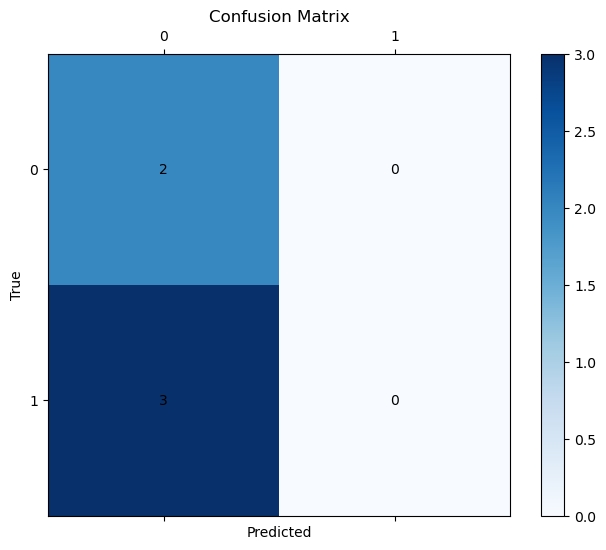

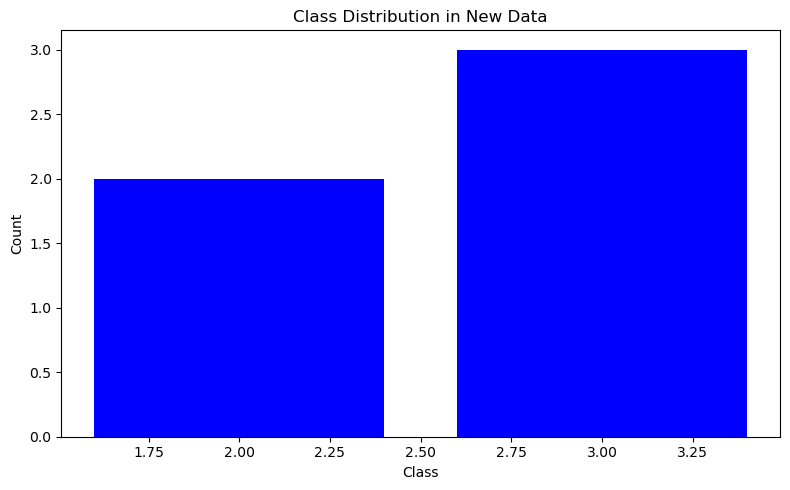

In [26]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Assuming df is already defined and contains the new data
# Replace 'path/to/your/trained_model.pkl' with the actual path to your saved model
model_path = 'random_forest_model_RSM_59f.pkl'

# Split the data into features and target
new_features = df.drop(columns=['Target'])
y_true = df['Target']

# Load the saved model
best_rf = joblib.load(model_path)

# Make predictions on the new features
y_pred = best_rf.predict(new_features)

# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)

# Display the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"\nAccuracy: {accuracy}")

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)
for (i, j), val in np.ndenumerate(conf_matrix):
    ax.text(j, i, f'{val}', ha='center', va='center')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot the number of class labels in the new dataset
unique, counts_true = np.unique(y_true, return_counts=True)
true_counts = dict(zip(unique, counts_true))

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(true_counts.keys(), true_counts.values(), color='blue')
ax.set_title('Class Distribution in New Data')
ax.set_xlabel('Class')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [27]:
# Perform t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot t-SNE results with class labels
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Target')
plt.title('t-SNE visualization of peak statistics')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

# Create a meshgrid for plotting decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X_tsne[:, 0].min() - 1, X_tsne[:, 0].max() + 1
y_min, y_max = X_tsne[:, 1].min() - 1, X_tsne[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Train the best RandomForestClassifier on the t-SNE data
best_rf_tsne = RandomForestClassifier(**best_params, random_state=42)
best_rf_tsne.fit(X_tsne, y)

# Predict classifications for the meshgrid
Z = best_rf_tsne.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
plt.colorbar(scatter, label='Target')
plt.title('t-SNE visualization with Decision Boundary')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

NameError: name 'TSNE' is not defined